In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [4]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [5]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [6]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [7]:
#in this dataset we have to remove unwanted columns
df1 = df.drop(['area_type','availability','balcony', 'society'], axis = 1)
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df1[['bhk','name']] = df['size'].str.split(' ', expand = True)
df2 = df1.drop(['size','name'], axis =1)
df2

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [10]:
df2.shape

(13320, 5)

In [11]:
#handle null values
df2.isnull().sum()

location       1
total_sqft     0
bath          73
price          0
bhk           16
dtype: int64

In [12]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [13]:
df3.bhk.unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return float(tokens[0])+float(tokens[1])/2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_sqft_to_num('2001-2024')

3013.0

In [18]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [19]:
df4.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [20]:
df5= df4.dropna()

In [21]:
df4.shape

(13246, 5)

In [22]:
df5.shape

(13200, 5)

In [23]:
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [24]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5

C:\Users\dines\AppData\Local\Temp\ipykernel_28224\699895677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']


,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [25]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.903582e+03
std      1.067277e+05
min      2.678298e+02
25%      4.237918e+03
50%      5.417545e+03
75%      7.307886e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [26]:
df5.to_csv("bhp.csv", index = False)

In [27]:
df5.location.value_counts()

location
Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: count, Length: 1298, dtype: int64

In [28]:
df5.location = df5.location.apply(lambda x : x.strip())
loc_stats = df5.location.value_counts()
loc_stats

C:\Users\dines\AppData\Local\Temp\ipykernel_28224\324106569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location = df5.location.apply(lambda x : x.strip())


location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [29]:
loc_stats.sum()

13200

In [30]:
len(loc_stats[loc_stats<=10])

1047

In [31]:
loc_stats_less_than10 = loc_stats[loc_stats<=10]
loc_stats_less_than10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [32]:
df5.location.value_counts()

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [33]:
df5.location = df5.location.apply(lambda x : 'other' if x in loc_stats_less_than10 else x)
df5.location

C:\Users\dines\AppData\Local\Temp\ipykernel_28224\256302093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location = df5.location.apply(lambda x : 'other' if x in loc_stats_less_than10 else x)


0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13200, dtype: object

In [34]:
df5.location.value_counts()

location
other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

In [35]:
# remove outliers using business logic -- average sqft of one bedroom is 300 so 2bhk apartment is minimum 600sqft. we should remove the records which is
# not satisfies the condition
#df5[df5.total_sqft/df5.bhk<300].head()
df5.bhk = df5.bhk.astype(float)

C:\Users\dines\AppData\Local\Temp\ipykernel_28224\1755791740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.bhk = df5.bhk.astype(float)


In [36]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   total_sqft      13200 non-null  float64
 2   bath            13200 non-null  float64
 3   price           13200 non-null  float64
 4   bhk             13200 non-null  float64
 5   price_per_sqft  13200 non-null  float64
dtypes: float64(5), object(1)
memory usage: 721.9+ KB


In [37]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8.0,6296.296296
70,other,500.0,3.0,100.0,3.0,20000.000000


In [38]:
df5.shape

(13200, 6)

In [39]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 6)

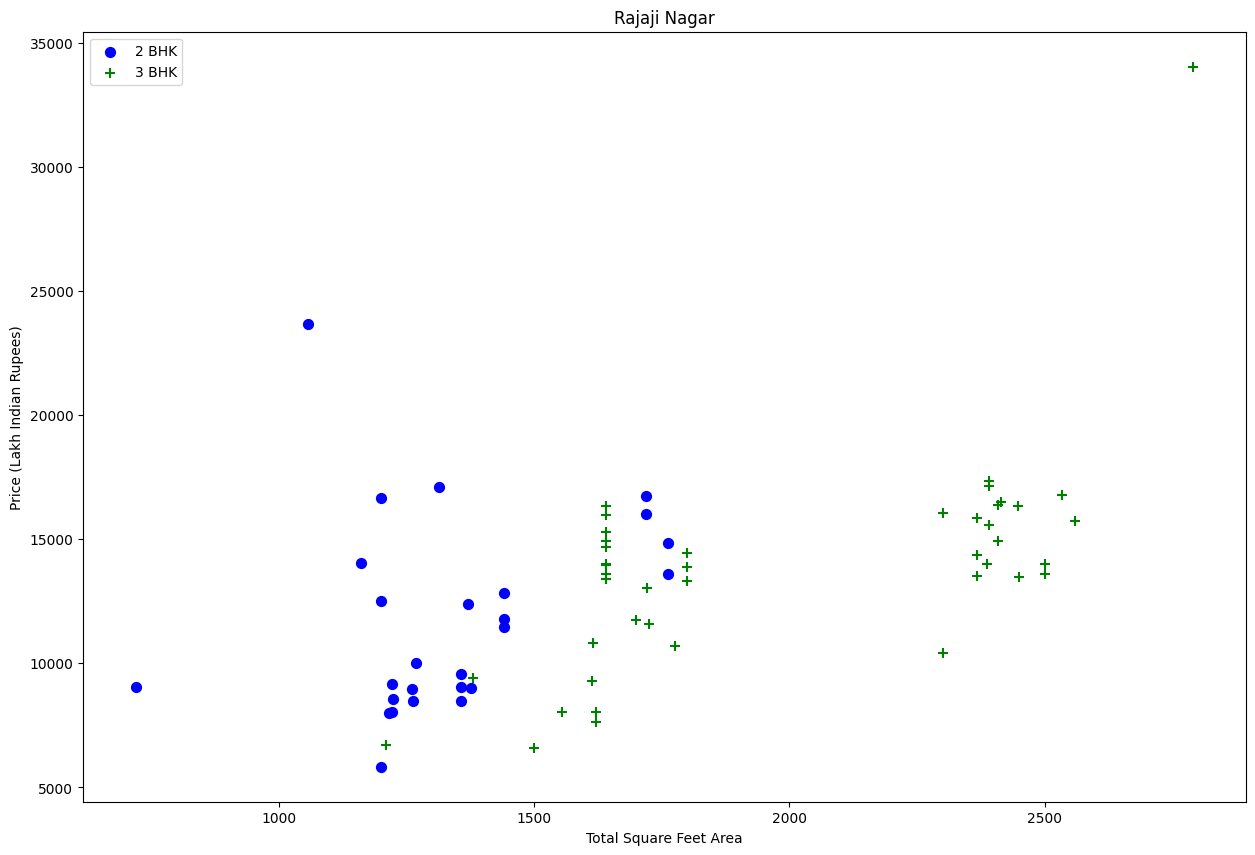

In [40]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()
plot_scatter_chart(df6,"Rajaji Nagar")

In [41]:
#remove outlier using std and mean 
df6.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1598.841548,2.562781,111.187960,2.649004,6290.299983
std,1269.660904,1.080275,152.203367,0.976046,4175.619211
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1118.000000,2.000000,49.000000,2.000000,4186.725844
50%,1300.000000,2.000000,70.000000,3.000000,5281.690141
75%,1702.250000,3.000000,115.000000,3.000000,6904.652015
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [42]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
df7 = remove_pps_outlier(df6)
df7.shape

(10232, 6)

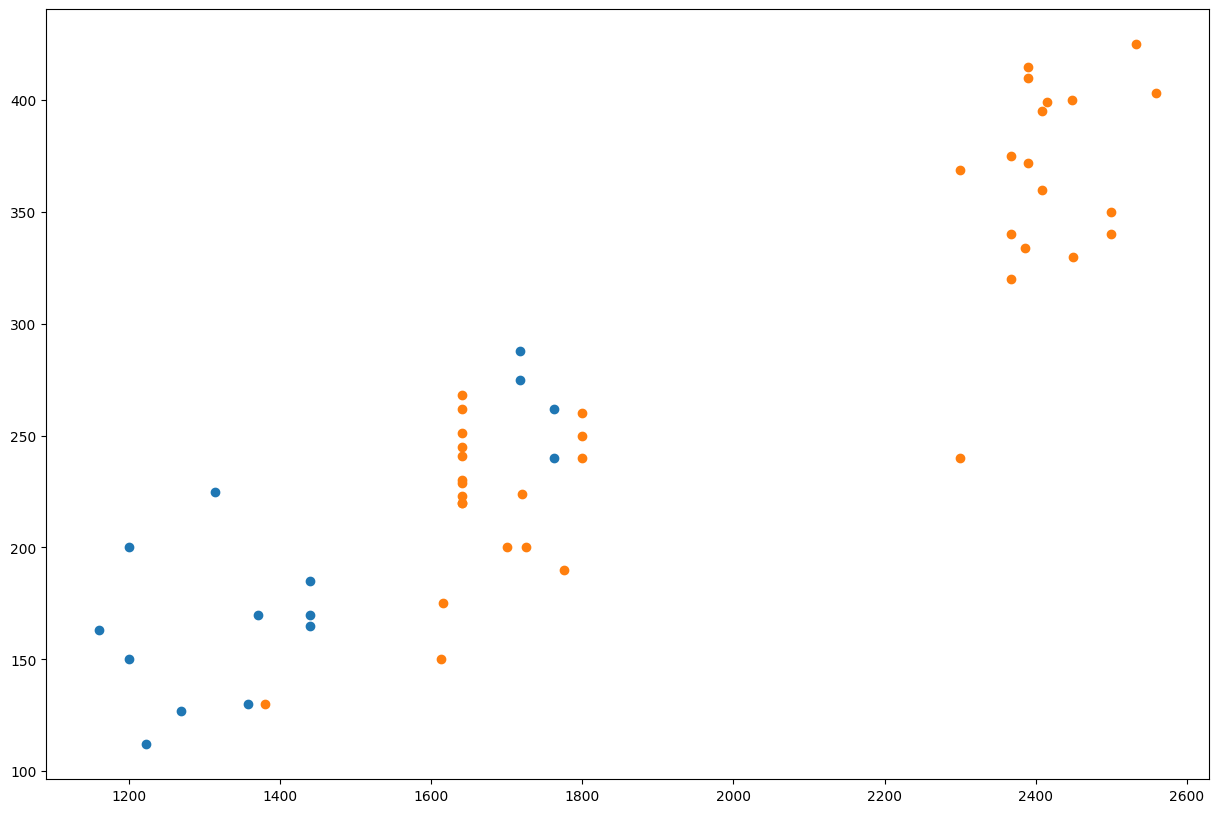

In [53]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price)
    plt.scatter(bhk3.total_sqft, bhk3.price)
    plt.show()

plot_scatter_chart(df7, "Rajaji Nagar")

In [54]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7313, 6)

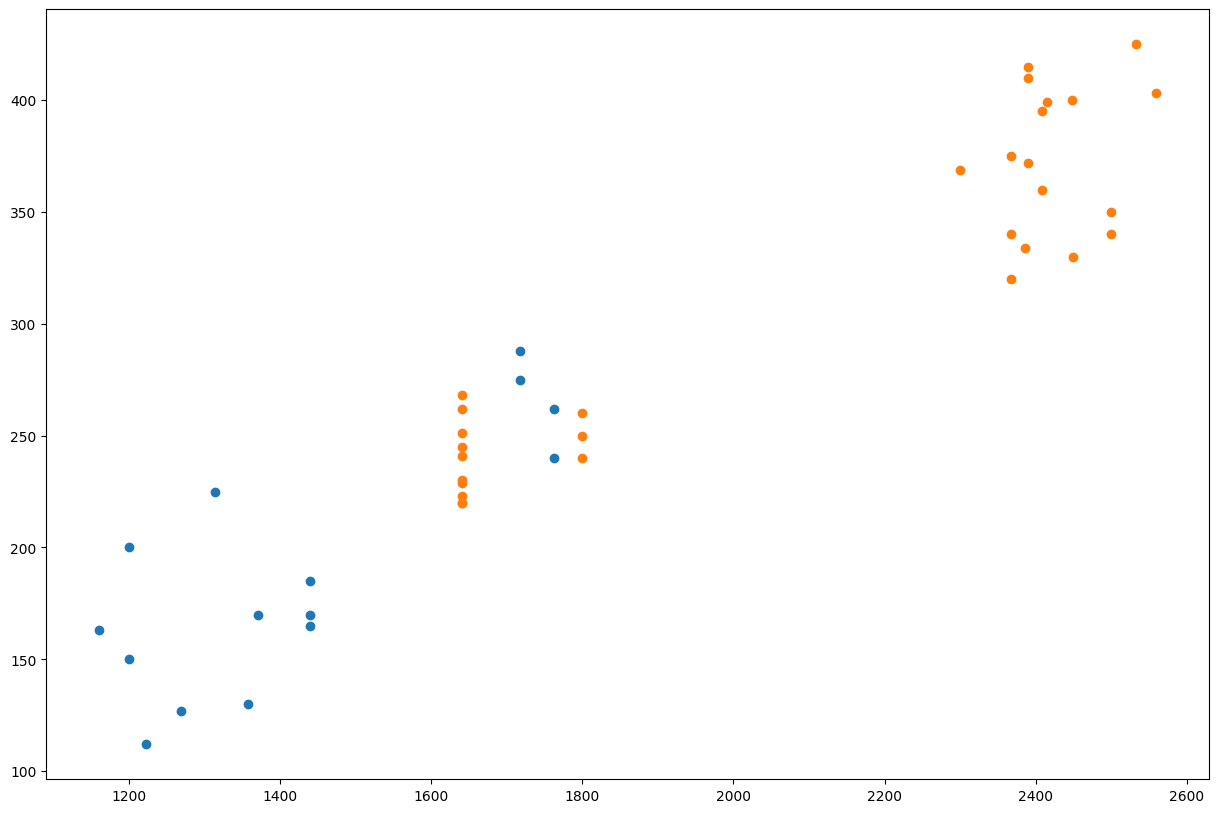

In [55]:
plot_scatter_chart(df8,"Rajaji Nagar")

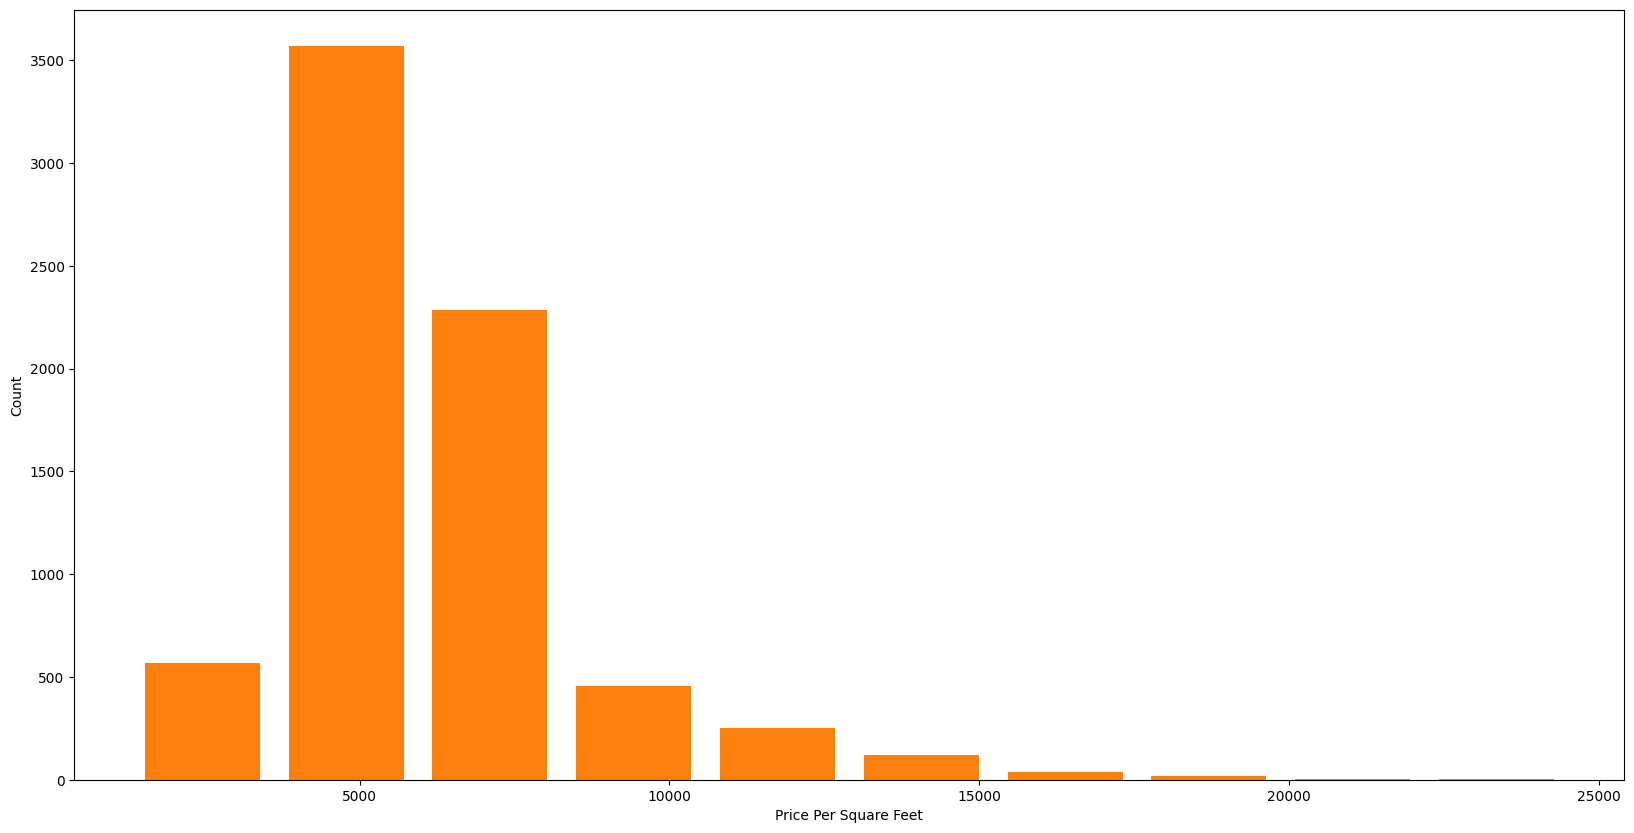

In [57]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

In [58]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

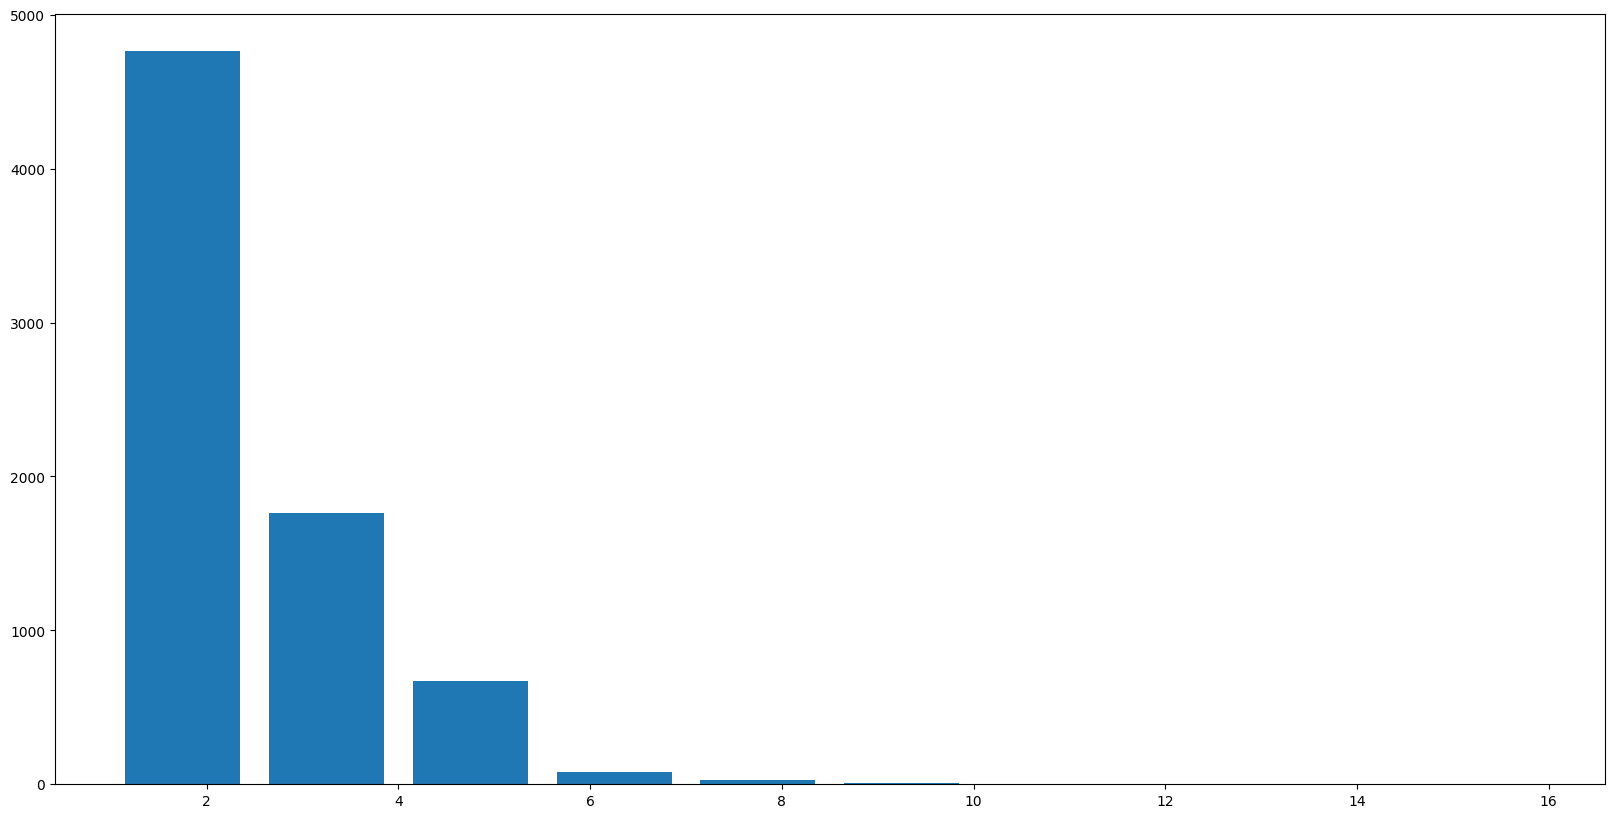

In [61]:
plt.hist(df8.bath,rwidth = 0.8)
plt.show()

In [62]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5273,Neeladri Nagar,4000.0,12.0,160.0,10.0,4000.000000
8473,other,12000.0,12.0,525.0,10.0,4375.000000
8562,other,10000.0,16.0,550.0,16.0,5500.000000
9296,other,6000.0,12.0,150.0,11.0,2500.000000
9627,other,5425.0,13.0,275.0,13.0,5069.124424


In [63]:
df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1625,Chikkabanavar,2460.0,7.0,80.0,4.0,3252.032520
5234,Nagasandra,7000.0,8.0,450.0,4.0,6428.571429
6705,Thanisandra,1806.0,6.0,116.0,3.0,6423.034330
8398,other,11338.0,9.0,1000.0,6.0,8819.897689


In [66]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 6)

In [67]:
df9.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668


In [69]:
df10 = df9.drop(['price_per_sqft'], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0


In [70]:
dummies = pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10224,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10228,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [73]:
df11 = pd.concat([df10,dummies.drop('other', axis= 'columns')], axis= 'columns')
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,other,1200.0,2.0,70.0,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10224,other,1800.0,1.0,200.0,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10227,other,1353.0,2.0,110.0,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10228,other,812.0,1.0,26.0,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
df12 = df11.drop('location', axis= 'columns')
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,1200.0,2.0,70.0,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10224,1800.0,1.0,200.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10227,1353.0,2.0,110.0,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10228,812.0,1.0,26.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
x = df12.drop('price', axis = 'columns')
x

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,1200.0,2.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10224,1800.0,1.0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10227,1353.0,2.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10228,812.0,1.0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
y = df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10223     70.0
10224    200.0
10227    110.0
10228     26.0
10231    400.0
Name: price, Length: 7239, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [82]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8364534927498756

In [90]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.8780757 , 0.87070119, 0.85422219, 0.82886803, 0.78380678])

In [100]:
#find best model using gridsearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    algos = {
        'LinearRegression' : {
            'model' : LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'Lasso':{
            'model' : Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision tree': {
            'model' : DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])

find_best_model(x,y)

C:\Users\dines\.conda\envs\dinesh_311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dines\.conda\envs\dinesh_311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dines\.conda\envs\dinesh_311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\dines\.conda\envs\dinesh_311\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(

,model,best_score,best_params
0,LinearRegression,0.843349,"{'fit_intercept': False, 'positive': False}"
1,Lasso,0.710800,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.677517,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [104]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns==location)[0][0]
    X = np.zeros(len(x.columns))
    X[0]= sqft
    X[1]= bath
    X[2]= bhk
    if loc_index >= 0 :
        X[loc_index] = 1
        return lr_clf.predict([X])[0]

In [105]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\dines\.conda\envs\dinesh_311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.84699754203058

In [115]:
predict_price('1st Phase JP Nagar',1000, 1, 1)

C:\Users\dines\.conda\envs\dinesh_311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.9645819426419

In [113]:
predict_price('Indira Nagar',100, 0, 0)

C:\Users\dines\.conda\envs\dinesh_311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.91317672102957